In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ticker = ['PG']
data = pd.DataFrame()
for t in ticker:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2007-01-01', end='2017-03-21')['Adj Close']

In [34]:
data.tail()

,PG
Date,
2017-03-16,89.369064
2017-03-17,88.939026
2017-03-20,89.154045
2017-03-21,89.124725
2017-03-22,88.929253


In [10]:
log_returns = np.log(1 + data.pct_change())

In [33]:
log_returns.tail()

,PG
Date,
2017-03-16,0.000438
2017-03-17,-0.004824
2017-03-20,0.002415
2017-03-21,-0.000329
2017-03-22,-0.002196


In [15]:
# Risk free rate
r = 0.025
# Time Horizon = 1 year
T = 1
t_intervals = 250
iterations = 10000
delta_t = T/t_intervals

In [14]:
stdev = (log_returns.std()*250**0.5)[0]
stdev

0.17651752102128934

In [29]:
Z = np.random.standard_normal((t_intervals +1, iterations))
S=np.zeros_like(Z)
S0 = data.iloc[-1][0]
S[0] = S0

In [30]:
Z

array([[ 0.0320554 ,  0.2981256 ,  2.30347383, ..., -0.40270719,
         0.08483636, -0.40097429],
       [-0.93523612, -1.24257847,  0.60747166, ..., -0.31162636,
        -0.41619026,  2.09029333],
       [-0.92204127, -1.62960474, -1.8412946 , ...,  1.14167752,
        -0.97642152,  1.46062856],
       ..., 
       [ 2.72042853,  0.3524435 ,  1.4545194 , ..., -0.13964091,
        -0.75836253,  0.72599165],
       [-2.07113746,  0.39761363, -0.42322323, ..., -0.651384  ,
         0.59371916, -0.88323175],
       [-0.86183259,  1.31522965, -0.92439547, ..., -0.47747928,
         0.34110679, -1.8419406 ]])

In [31]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])

In [32]:
S

array([[  88.929253  ,   88.929253  ,   88.929253  , ...,   88.929253  ,
          88.929253  ,   88.929253  ],
       [  88.00889589,   87.70744127,   89.53777549, ...,   88.62374696,
          88.52035275,   91.03233319],
       [  87.11089491,   86.12946791,   87.71932023, ...,   89.76392406,
          87.56395704,   92.53239672],
       ..., 
       [  79.87440956,   73.35245647,  101.60026279, ...,  102.03369882,
         105.84975263,   88.31929412],
       [  78.05167694,   73.68156372,  101.1251605 , ...,  101.29821652,
         106.55769693,   87.45600962],
       [  77.30722057,   74.77424098,  100.09069675, ...,  100.76347455,
         106.96828358,   85.67921579]])

In [37]:
S.shape

(251, 10000)

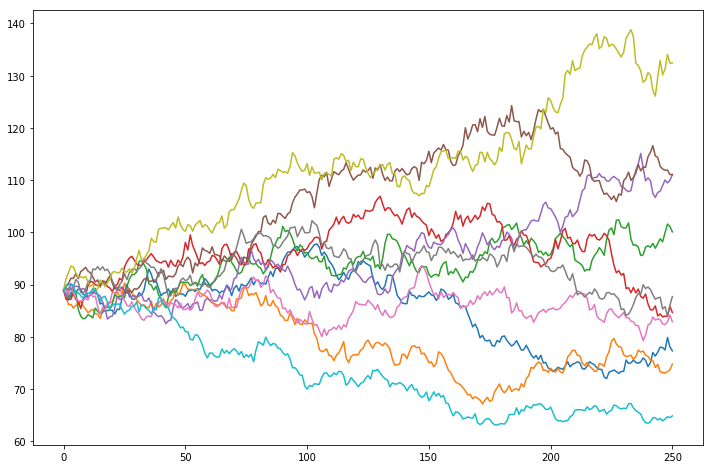

In [40]:
plt.figure(figsize=(12,8))
plt.plot(S[:,:10]);

In [44]:
S[-1]

array([  77.30722057,   74.77424098,  100.09069675, ...,  100.76347455,
        106.96828358,   85.67921579])

In [46]:
p = np.maximum(S[-1] - 110, 0)
p

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [43]:
p.shape

(10000,)

In [47]:
C = np.exp(-r*T)*np.sum(p)/iterations

In [48]:
C

1.2903937823271088